# Lab 9 - st121413
## Akraradet Sinsamersuk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.signal as signal
from scipy.fftpack import fft, fftshift
plt.style.use('seaborn-whitegrid')


def calFFT(signal, window = 2048 , shift = False , inDB = False, half = True, normf=True, fs=None):
    mag = np.abs(fft(signal, window) / (len(signal)/2.0))
    freq = np.linspace(0, 1, len(mag))

    if shift:
        mag = np.abs(fftshift(mag / abs(mag).max() ) )
        freq = np.linspace(-0.5, 0.5, len(mag))
        
    
    if inDB:
        mag = 20 * np.log10( mag )

    if normf == False:
        if fs == None:
            raise ValueError("Give me 'fs'")
        freq = np.linspace(0, fs, len(mag) )

    if half:
        mag = mag[:len(mag)//2]
        freq = freq[:len(freq)//2]



    return mag, freq

## 4.1 Power Spectral Density
1. The signal x(t) is defined as below.

The signal is sampled at a sampling rate of 1000 samples per second. 

Find the power content and power spectral density for this signal.


x(t) = cos(2π47t) + cos(2π219t) 0 ≤ t ≤ 10; 0 otherwise

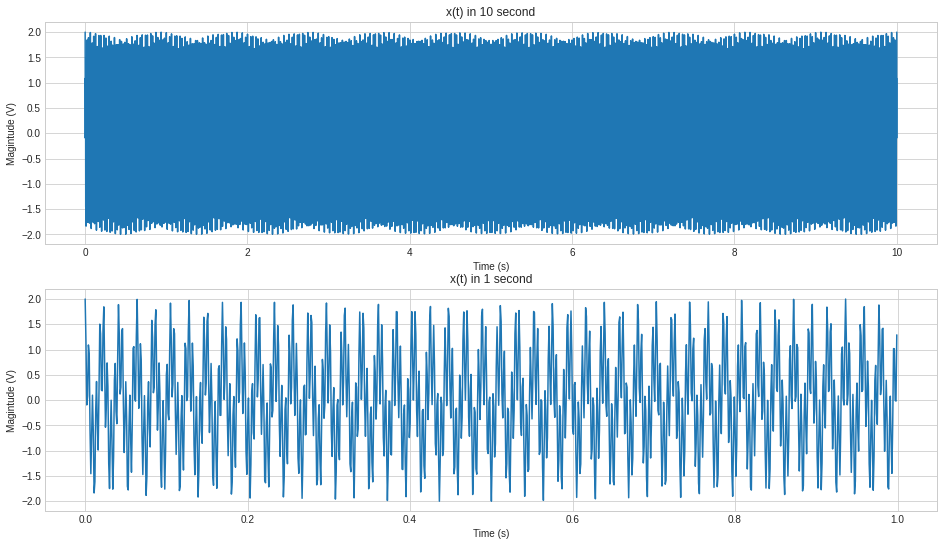

In [267]:

t = np.linspace(0,10, 10 * 1000)
xt = np.cos(2 * np.pi * 47 * t) + np.cos(2 * np.pi * 219 * t)
fig, ax = plt.subplots(2, figsize=(16,9))

ax[0].plot(t,xt)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magintude (V)')
ax[0].set_title('x(t) in 10 second')

ax[1].plot(t[:1000],xt[:1000])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Magintude (V)')
ax[1].set_title('x(t) in 1 second')

plt.show()

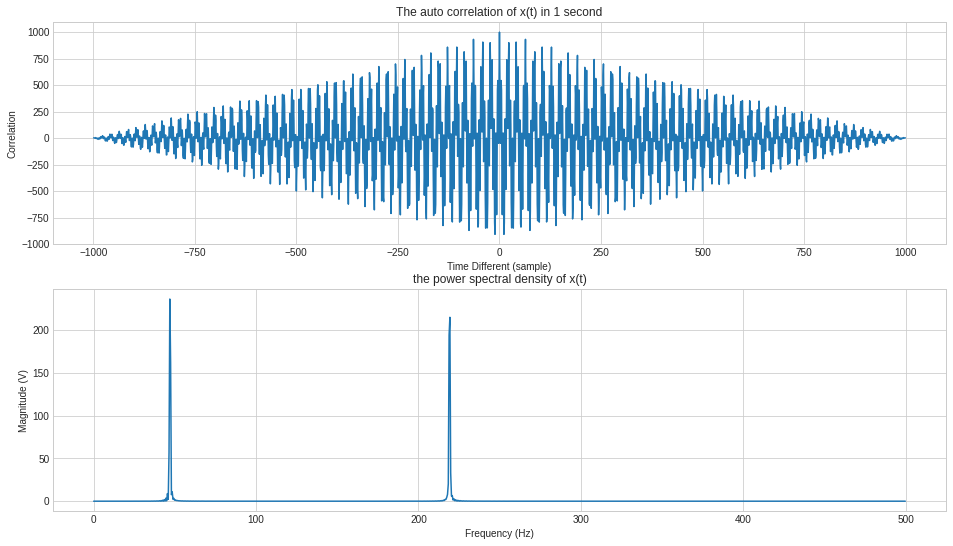

In [289]:
# Finding the Power Content ??

# Finding the Power Spectral Density
# 1. Find the AutoCorrelation of x(t) -> get Rx
def autocorrelation(x):
    x = np.array(x).reshape(-1,1)
    mat = x @ x.T
    b = np.zeros(2*len(x) - 1)
    for t1 in range(len(x)):
        for t2 in range(len(x)):
            k = t1-t2+len(x)-1
            b[k] += mat[t1][t2]
    return b

Rx = autocorrelation(xt[:1000])
t = np.arange((-1000+1), 1000, 1)
fig, ax = plt.subplots(2, figsize=(16,9))
ax[0].plot(t,Rx)
ax[0].set_xlabel("Time Different (sample)")
ax[0].set_ylabel("Correlation")
ax[0].set_title("The auto correlation of x(t) in 1 second")

# 2. Find the Fourier Transform of Rx -> get Gx
Gx, f_range = calFFT(Rx,normf=False, fs=1000)
ax[1].plot(f_range, Gx)
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Magnitude (V)")
ax[1].set_title("the power spectral density of x(t)")
plt.show()

## 4.2 Random Processes

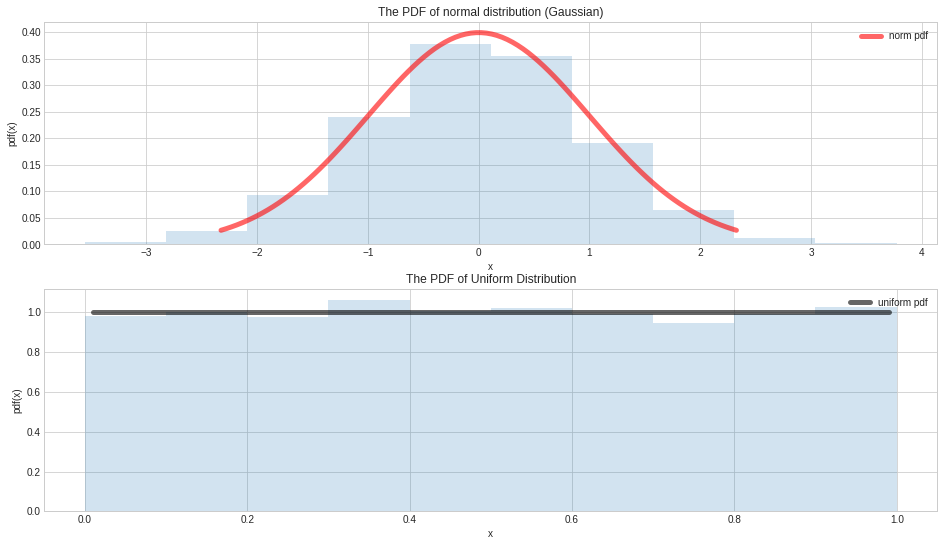

In [6]:
# 1. Generate and plot a sequence of normaly (Gaussian) distributed and uniformly distributed random numbers and their histograms.
fig, ax = plt.subplots(2, figsize=(16,9))


x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
ax[0].plot(x, stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = stats.norm.rvs(size=10000)
ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax[0].legend(loc='best', frameon=False)
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')
ax[0].set_title('The PDF of normal distribution (Gaussian)')

x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax[1].plot(x, stats.uniform.pdf(x), 'k-', lw=5, alpha=0.6, label='uniform pdf')
r = stats.uniform.rvs(size=10000)
ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax[1].legend(loc='best', frameon=False)
ax[1].set_xlabel('x')
ax[1].set_ylabel('pdf(x)')
ax[1].set_title('The PDF of Uniform Distribution')

plt.show()

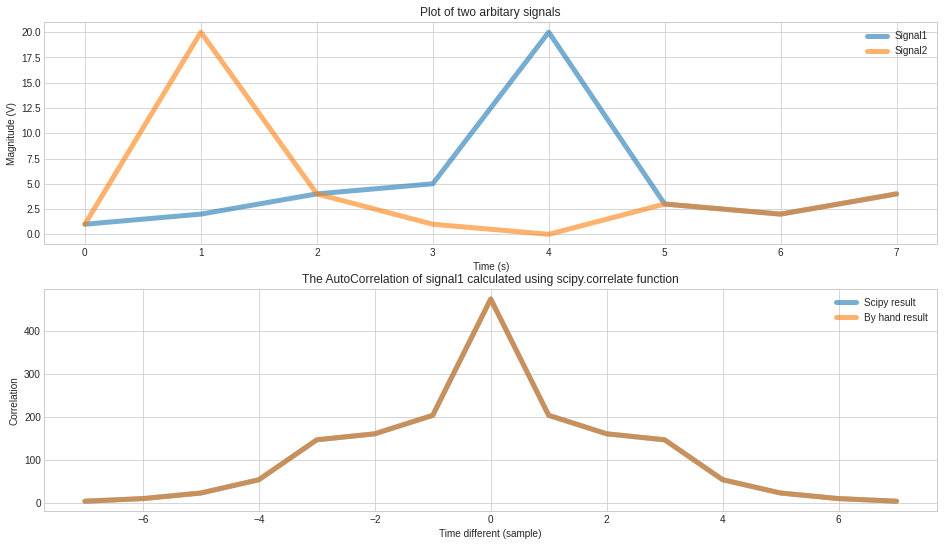

In [248]:
# 2. Write down your own auto correlation function to find the auto correlation of a signal.
s1 = [1,2,4,5,20,3,2,4]
s2 = [1,20,4,1,0,3,2,4]

fig, ax = plt.subplots(2, figsize=(16,9))
ax[0].plot(s1, label="Signal1", lw=5, alpha=0.6)
ax[0].plot(s2, label="Signal2", lw=5, alpha=0.6)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title('Plot of two arbitary signals')
ax[0].legend()


# Perform autocorrelation using existing library
# https://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation
def autocorr(x):
    x = np.array(x)
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

# direct - The correlation is determined directly from sums, the definition of correlation.

t = np.arange((-len(s1)+1), len(s1), 1)
acr = signal.correlate(s1,s1,mode='full',method='direct')
ax[1].plot(t,acr, label="Scipy result", lw=5, alpha=0.6)
ax[1].set_xlabel('Time different (sample)')
ax[1].set_ylabel('Correlation')
ax[1].set_title('The AutoCorrelation of signal1 calculated using scipy.correlate function')

# Do it by hand
def autocorrelation(x):
    x = np.array(x).reshape(-1,1)
    mat = x @ x.T
    b = np.zeros(2*len(x) - 1)
    for t1 in range(len(x)):
        for t2 in range(len(x)):
            k = t1-t2+len(x)-1
            b[k] += mat[t1][t2]
    return b

acr_byhand = autocorrelation(s1)

ax[1].plot(t,acr_byhand, label="By hand result", lw=5, alpha=0.6)
ax[1].legend()
plt.show()

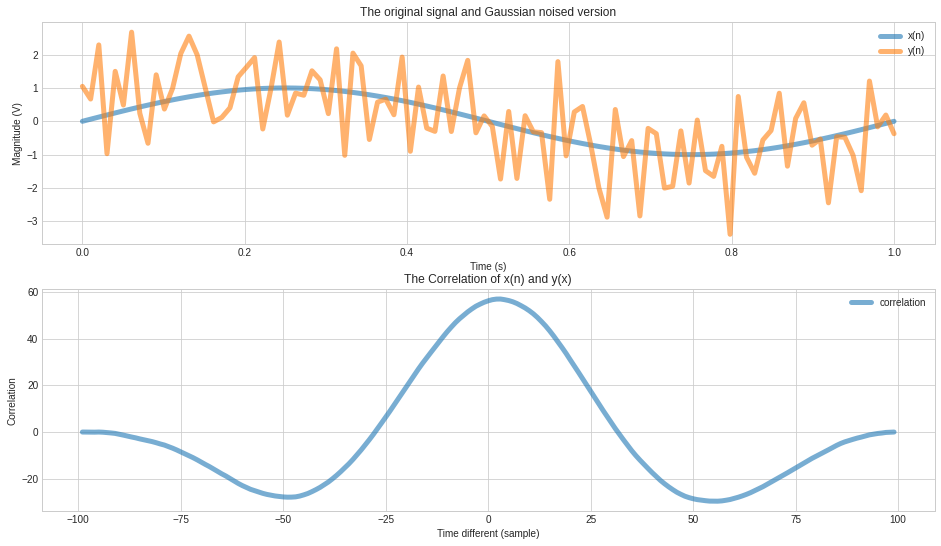

In [249]:
# 3. Plot the crosscorrelation of the following signal with f1 =1 Hz
# x(n) = sin(2*π*f1*t)
# y(n) = x(n) + w(n)

# where w(n) is a zeros mean, unit variance of Gaussian random process.

t = np.linspace(0,1,100)
xn = np.sin(2 * np.pi * 1 * t)
yn = xn + np.random.randn(100)


fig, ax = plt.subplots(2, figsize=(16,9))
ax[0].plot(t,xn, label="x(n)", lw=5, alpha=0.6)
ax[0].plot(t,yn, label="y(n)", lw=5, alpha=0.6)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Magnitude (V)")
ax[0].set_title("The original signal and Gaussian noised version")
ax[0].legend()

def crosscorrelation(x1,x2):
    x1 = np.array(x1).reshape(-1,1)
    x2 = np.array(x2).reshape(-1,1)
    mat = x1 @ x2.T
    b = np.zeros(len(x1) + len(x2)-1)
    for t1 in range(len(x1)):
        for t2 in range(len(x2)):
            k = t1-t2+len(x1)-1
            b[k] += mat[t1][t2]
    return b    


ccr = crosscorrelation(xn,yn)
# print(ccr.shape)
ax[1].plot(np.arange(-99,100), ccr,label="correlation", lw=5, alpha=0.6)
ax[1].set_xlabel("Time different (sample)")
ax[1].set_ylabel("Correlation")
ax[1].set_title("The Correlation of x(n) and y(x)")
ax[1].legend()
plt.show()

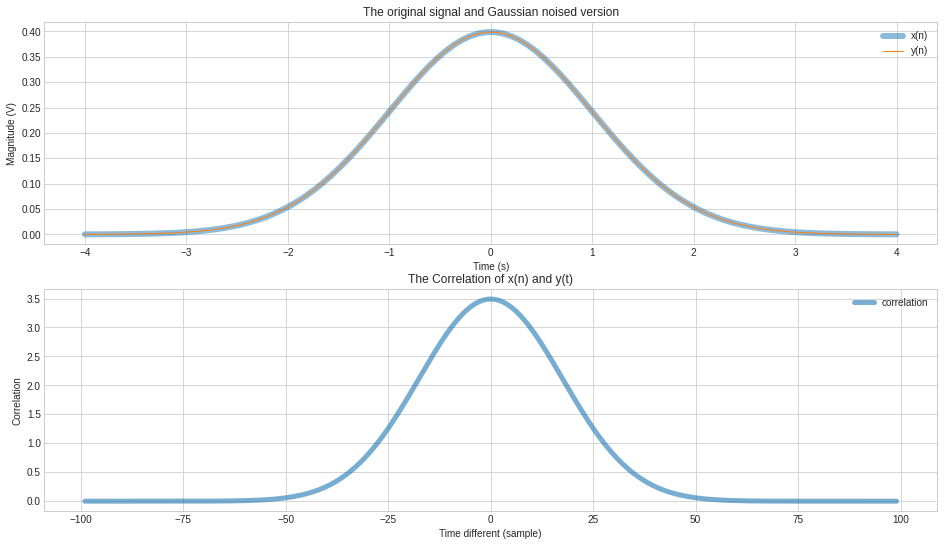

In [251]:
# 4. For a linear time-invariant system: “The cross correlation of the output,y(n) and the input, x(n) [i.e. Ryx(m)] is equal to its impulse response when the input is white noise”.
# Ryx(m) = h(n)when x(n) is zero mean unit variance white Gaussian Noise. Write a program to illustrate this property.

# white noise => constant PSDs over a wide range of frequencies.


def guassian(x, var = 1, mean = 0):
    a = 1 / (var * (2 * np.pi)**0.5)
    b = np.exp( -0.5 * (x-mean/var)**2   )
    return a * b

t = np.linspace(-4,4,100)
xn = guassian(t)
yn = xn
# xn = np.random.randn(10)
# yn = xn# + np.random.randn(100)

fig, ax = plt.subplots(2, figsize=(16,9))
ax[0].plot(t,xn, label="x(n)", lw=6, alpha=0.5)
ax[0].plot(t,yn, label="y(n)", lw=1, alpha=1)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Magnitude (V)")
ax[0].set_title("The original signal and Gaussian noised version")
ax[0].legend()

ccr = crosscorrelation(xn,yn)
# print(ccr.shape)
ax[1].plot(np.arange(-99,100), ccr,label="correlation", lw=5, alpha=0.6)
ax[1].set_xlabel("Time different (sample)")
ax[1].set_ylabel("Correlation")
ax[1].set_title("The Correlation of x(n) and y(t)")
ax[1].legend()
plt.show()

## 5 Discussion
A pulse x(t) is transmitted, the reflected signal from an object is returned to the receiver. 

The returned signal (r(t)) is delayed (i.e. D seconds), noisy and attenuated. 

Describe how to measure (estimate) the time delay between the transmitted and the returned signal using knowledge of cross correlation.

r(t) = alpha * x(t-D) + w(t)


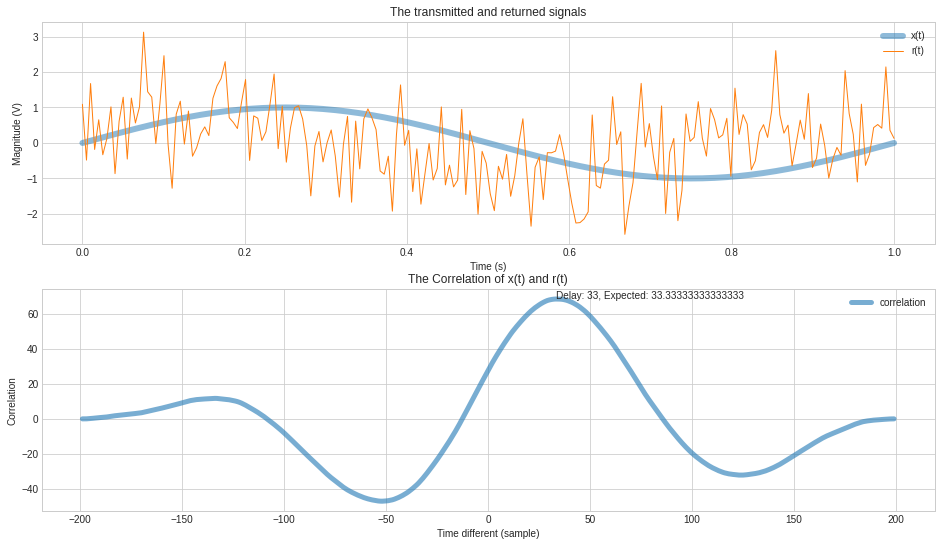

In [262]:
# Let's model some signal

sample = 200
f = 1
alpha = 0.7 # Attunuated factor
D = -10/60.0 # Dalay factor
t = np.linspace(0,1, sample)
xt = np.sin(2 * np.pi * f * t)
rt = alpha * np.sin(2 * np.pi * f * (t-D)) + np.random.randn(sample)

fig, ax = plt.subplots(2, figsize=(16,9))
ax[0].plot(t,xt, label="x(t)", lw=6, alpha=0.5)
ax[0].plot(t,rt, label="r(t)", lw=1, alpha=1)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Magnitude (V)")
ax[0].set_title("The transmitted and returned signals")
ax[0].legend()

ccr = crosscorrelation(xt,rt)
ax[1].plot(np.arange(-199,200), ccr,label="correlation", lw=5, alpha=0.6)
ax[1].set_xlabel("Time different (sample)")
ax[1].set_ylabel("Correlation")
ax[1].set_title("The Correlation of x(t) and r(t)")
ax[1].annotate(f"Delay: {np.argmax(ccr)-200}, Expected: {10/60.0 * 200}",( np.argmax(ccr)-200,max(ccr) ) )
ax[1].legend()
plt.show()